In [38]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, Matern, ExpSineSquared, ConstantKernel as C

np.random.seed(1)

## RBF Kernel

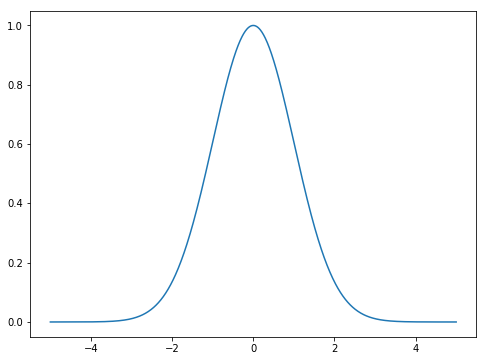

In [63]:
# Plotting Kernel Function
###################

# Defining function
def f(x):
    return np.exp(-(x**2)/2)

# Generating inputs and outputs
x = np.atleast_2d(np.linspace(-5, 5, 1000)).T
y = f(x)

plt.figure(figsize=(8,6))
#plt.axis('off')
plt.plot(x, y)

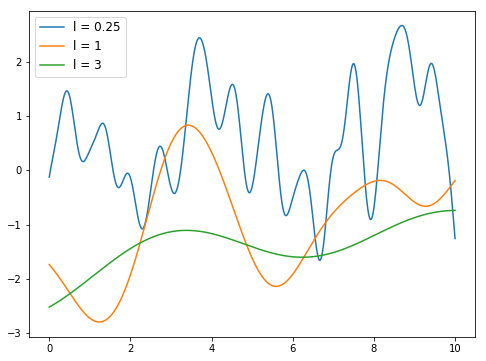

In [69]:
# Plotting GP Draws
###################

# Input data
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Initializing kernel
kernel1 = RBF(0.25, (1e-5, 1e5))
kernel2 = RBF(1, (1e-5, 1e5))
kernel3 = RBF(3, (1e-5, 1e5))

# Intializing GP
gp1 = GaussianProcessRegressor(kernel=kernel1, n_restarts_optimizer=9)
gp2 = GaussianProcessRegressor(kernel=kernel2, n_restarts_optimizer=9)
gp3 = GaussianProcessRegressor(kernel=kernel3, n_restarts_optimizer=9)

# Drawing sample from a GP
sample1 = gp1.sample_y(x, n_samples=1, random_state=0)
sample2 = gp2.sample_y(x, n_samples=1, random_state=0)
sample3 = gp3.sample_y(x, n_samples=1, random_state=0)

plt.figure(figsize=(8,6))
plt.plot(x,sample1,label='l = 0.25')
plt.plot(x,sample2,label='l = 1')
plt.plot(x,sample3,label='l = 3')
plt.legend(fontsize='large')

## Rational Quadratic Kernel

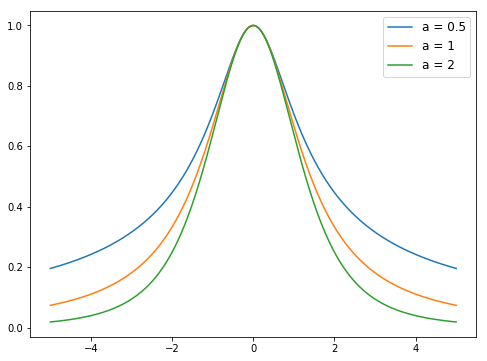

In [70]:
# Plotting Kernel Function
###################

# Defining function
def f(x, alpha):
    return (1 + (x**2/(2*alpha)))**(-alpha)

# Generating inputs and outputs
x = np.atleast_2d(np.linspace(-5, 5, 1000)).T
y1 = f(x,0.5)
y2 = f(x,1)
y3 = f(x,2)

plt.figure(figsize=(8,6))
plt.plot(x,y1,label='a = 0.5')
plt.plot(x,y2,label='a = 1')
plt.plot(x,y3,label='a = 2')
plt.legend(fontsize='large')

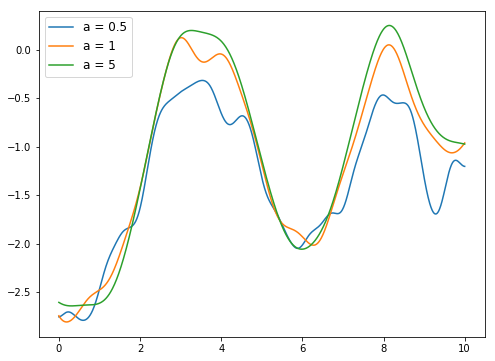

In [73]:
# Plotting GP Draws
###################

# Input data
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Initializing kernel
kernel1 = RationalQuadratic(1, 0.25)
kernel2 = RationalQuadratic(1, 1)
kernel3 = RationalQuadratic(1, 5)

# Intializing GP
gp1 = GaussianProcessRegressor(kernel=kernel1, n_restarts_optimizer=9)
gp2 = GaussianProcessRegressor(kernel=kernel2, n_restarts_optimizer=9)
gp3 = GaussianProcessRegressor(kernel=kernel3, n_restarts_optimizer=9)

# Drawing sample from a GP
sample1 = gp1.sample_y(x, n_samples=1, random_state=0)
sample2 = gp2.sample_y(x, n_samples=1, random_state=0)
sample3 = gp3.sample_y(x, n_samples=1, random_state=0)

plt.figure(figsize=(8,6))
plt.plot(x,sample1,label='a = 0.5')
plt.plot(x,sample2,label='a = 1')
plt.plot(x,sample3,label='a = 5')
plt.legend(fontsize='large')

## Matern Class of Kernels

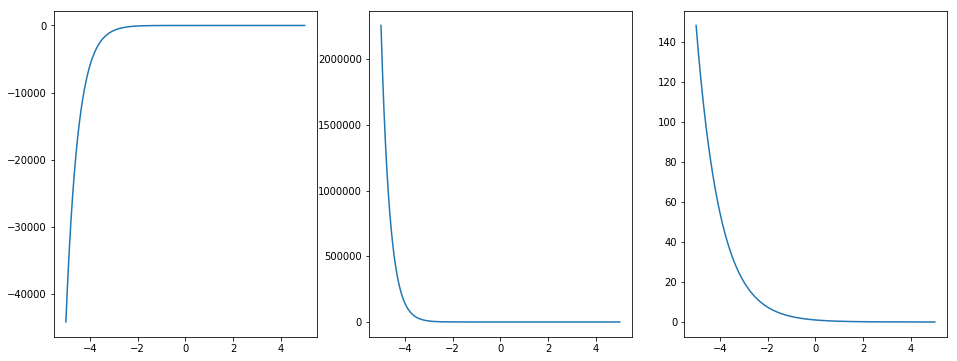

In [75]:
# Plotting Kernel Function
###################

# Defining functions
def f1(x):
    return (1 + np.sqrt(3)*x)*np.exp(-np.sqrt(3)*x)

def f2(x):
    return (1 + np.sqrt(5)*x + (5*x**2)/3)*np.exp(-np.sqrt(5)*x)

def f3(x):
    return np.exp(-x)

# Generating inputs and outputs
x = np.atleast_2d(np.linspace(-5, 5, 1000)).T
y1 = f1(x)
y2 = f2(x)
y3 = f3(x)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,6))
ax1.plot(x, y1)
ax2.plot(x, y2)
ax3.plot(x, y3)

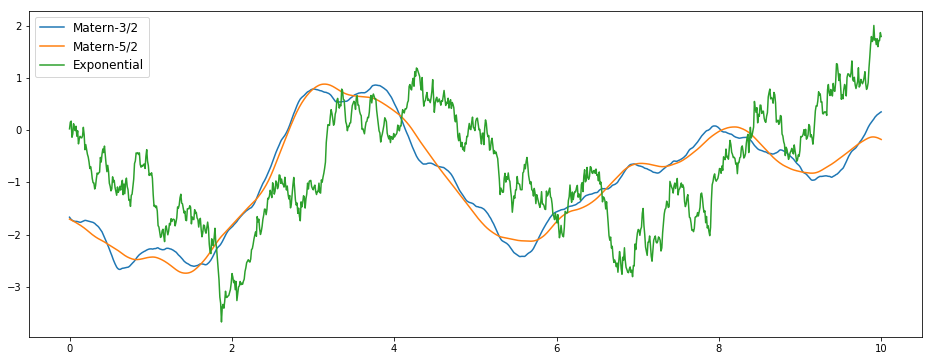

In [78]:
# Plotting GP Draws
###################

# Input data
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Initializing kernel
kernel1 = Matern(1, nu=1.5)
kernel2 = Matern(1, nu=2.5)
kernel3 = Matern(1, nu=0.5)

# Intializing GP
gp1 = GaussianProcessRegressor(kernel=kernel1, n_restarts_optimizer=9)
gp2 = GaussianProcessRegressor(kernel=kernel2, n_restarts_optimizer=9)
gp3 = GaussianProcessRegressor(kernel=kernel3, n_restarts_optimizer=9)

# Drawing sample from a GP
sample1 = gp1.sample_y(x, n_samples=1, random_state=0)
sample2 = gp2.sample_y(x, n_samples=1, random_state=0)
sample3 = gp3.sample_y(x, n_samples=1, random_state=0)

plt.figure(figsize=(16,6))
plt.plot(x,sample1,label='Matern-3/2')
plt.plot(x,sample2,label='Matern-5/2')
plt.plot(x,sample3,label='Exponential')
plt.legend(fontsize='large')

## Periodic Kernel

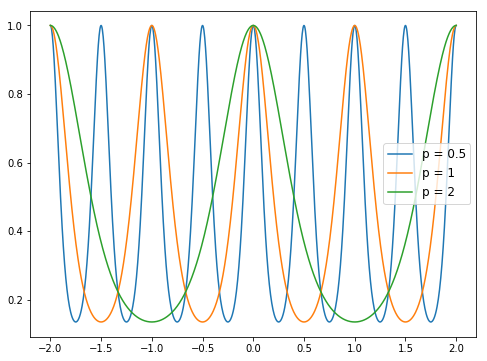

In [85]:
# Plotting Kernel Function
###################

# Defining functions
def f(x,p):
    return np.exp(-2*(np.sin(np.pi*x/p))**2)


# Generating inputs and outputs
x = np.atleast_2d(np.linspace(-2, 2, 1000)).T
y1 = f(x,0.5)
y2 = f(x,1)
y3 = f(x,2)

plt.figure(figsize=(8,6))
plt.plot(x, y1,label='p = 0.5')
plt.plot(x, y2,label='p = 1')
plt.plot(x, y3,label='p = 2')
plt.legend(fontsize='large')

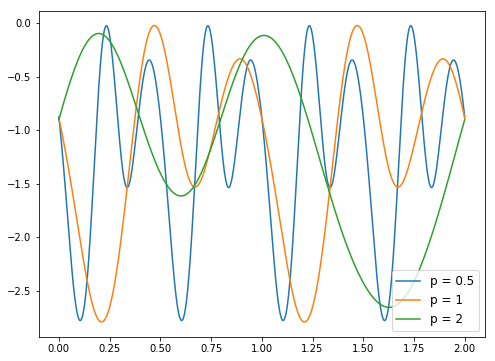

In [93]:
# Plotting GP Draws
###################

# Input data
x = np.atleast_2d(np.linspace(0, 2, 1000)).T

# Initializing kernel
kernel1 = ExpSineSquared(1, 0.5)
kernel2 = ExpSineSquared(1, 1)
kernel3 = ExpSineSquared(1, 2)

# Intializing GP
gp1 = GaussianProcessRegressor(kernel=kernel1, n_restarts_optimizer=9)
gp2 = GaussianProcessRegressor(kernel=kernel2, n_restarts_optimizer=9)
gp3 = GaussianProcessRegressor(kernel=kernel3, n_restarts_optimizer=9)

# Drawing sample from a GP
sample1 = gp1.sample_y(x, n_samples=1, random_state=0)
sample2 = gp2.sample_y(x, n_samples=1, random_state=0)
sample3 = gp3.sample_y(x, n_samples=1, random_state=0)

plt.figure(figsize=(8,6))
plt.plot(x,sample1,label='p = 0.5')
plt.plot(x,sample2,label='p = 1')
plt.plot(x,sample3,label='p = 2')
plt.legend(fontsize='large')

## Spectral Mixture Kernel

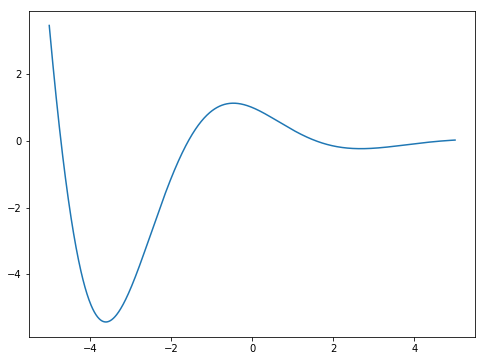

In [4]:
# Plotting Kernel Function
###################

# Defining functions
def f(x):
    return np.exp(-0.5*x)*np.cos(x)


# Generating inputs and outputs
x = np.atleast_2d(np.linspace(-5, 5, 1000)).T
y = f(x)

plt.figure(figsize=(8,6))
plt.plot(x, y)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: covariance is not symmetric positive-semidefinite.


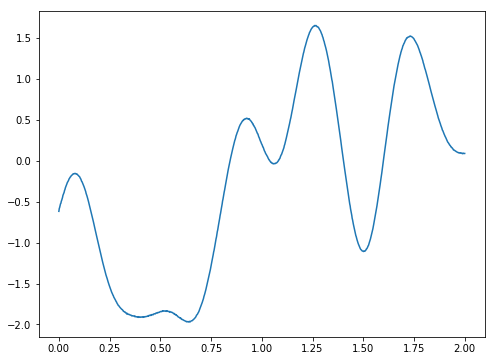

In [92]:
# Plotting GP Draws
###################
import sys
sys.path.append("..")
from mcpm.kernels import *

# Input data
x0 = np.zeros(1000).reshape(1000,1).astype('float32')
x = np.linspace(0,2,1000).reshape(-1,1).astype('float32')
mean = np.zeros(1000)

# Initialising kernel
SM_kernel = SM(num_dimensions=1, num_components=1, weights=[[1.0]], means=None, var_scale=1.0, mean_scale=1.0, 
                       jitter=0.01, init=False, mask=None, std_dev=1.0)

# Kernel function
def gram_matrix(x1,x2):
    init_op = tf.initialize_all_variables()
    with tf.Session() as sess:
        sess.run(init_op)
        k = sess.run(SM_kernel.kernel(x1,x2))
    return k

# GP function
def GP(a , b, mu, kernel, samples) :
    f = np.random.multivariate_normal(mu.flatten(), kernel(a, b) , samples)
    return f

# Sample from GP
sample = GP(x, x, mean, gram_matrix, 1)

# Plot samples from GP
plt.figure(figsize=(8,6))
plt.plot(x, sample.reshape(1000,1))